In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from utils import *

/Users/perezge/Library/CloudStorage/OneDrive-KAUST/Data_analysis_in_geoscience/project_data_analysis_repository/code/utils.py:133: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temp_data['DateTime'] = pd.to_datetime(temp_data['DateTime'], infer_datetime_format=True)
/Users/perezge/Library/CloudStorage/OneDrive-KAUST/Data_analysis_in_geoscience/project_data_analysis_repository/code/utils.py:133: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  temp_data['DateTime'] = pd.to_datetime(temp_data['DateTime'], infer_datetime_format=True)
/Users/perezge/Library/CloudStorage/OneDrive-KAUST/Data_analysis_in_geoscience/project_data_analysis_repository/code/utils.p

In [2]:
data_by_month = select_by_month(selected_month = 2, station_names = station_names, data_dic = data_dic)

# formart data time and geometry to convert in geodataframe
data_by_month['DateTime'] = pd.to_datetime(data_by_month['DateTime'], format="%Y-%m-%d")
data_by_month['geometry'] = data_by_month.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
# transforme dataframe into geodataframe 
data_by_month = gpd.GeoDataFrame(data_by_month, geometry='geometry')
data_by_month.set_crs(epsg=4686, inplace=True)
data_by_month.head()

/opt/homebrew/Caskroom/miniforge/base/envs/torch2/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/perezge/Library/CloudStorage/OneDrive-KAUST/Data_analysis_in_geoscience/project_data_analysis_repository/code/utils.py:206: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_by_month.fillna(method='ffill', inplace=True)
/opt/homebrew/Caskroom/miniforge/base/envs/torch2/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,DateTime,PM10,CO,PM2.5,station_name,longitude,latitude,geometry
0,2023-02-01,58.125000,0.741667,30.800000,Puente_Aranda,-74.117483,4.631767,POINT (-74.11748 4.63177)
1,2023-02-02,43.737500,0.345833,25.833333,Puente_Aranda,-74.117483,4.631767,POINT (-74.11748 4.63177)
2,2023-02-03,51.243478,0.921739,27.578261,Puente_Aranda,-74.117483,4.631767,POINT (-74.11748 4.63177)
3,2023-02-04,40.170833,0.662500,22.416667,Puente_Aranda,-74.117483,4.631767,POINT (-74.11748 4.63177)
4,2023-02-05,24.487500,0.400000,14.320833,Puente_Aranda,-74.117483,4.631767,POINT (-74.11748 4.63177)


In [3]:
# merge municipalities polygons to databymonth
merged_municipalities = gpd.sjoin(municipalities3, data_by_month, how="left", op='contains')
muni = merged_municipalities.dropna()

/opt/homebrew/Caskroom/miniforge/base/envs/torch2/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


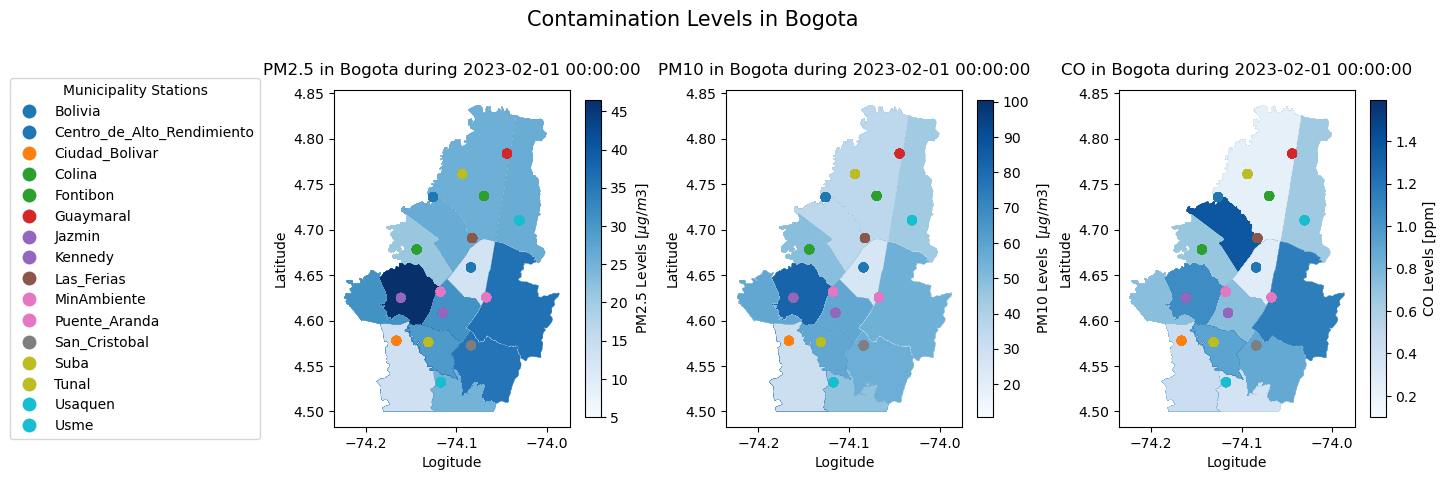

In [4]:
# plot the values of PM2.5 in Bogota
fig, ax = plt.subplots(1, 3,figsize=(15, 7))
labels = ['PM2.5 Levels [$\mu g/m3$]', 'PM10 Levels  [$\mu g/m3$]', 'CO Levels [ppm]']

# Plot values of PM2.5 for each municipality
muni_plot = muni.plot(column='PM2.5', ax=ax[0], legend=False, cmap='Blues')
# Plot the location of the stations
station_plot = data_by_month.plot(ax=ax[0], column='station_name', legend=True)
# Create a colorbar for PM2.5
norm = Normalize(vmin=muni['PM2.5'].min(), vmax=muni['PM2.5'].max())
#norm = Normalize(vmin = 12, vmax= 35)
sm = ScalarMappable(norm=norm, cmap='Blues')
cbar = fig.colorbar(sm, ax=ax[0], shrink = 0.5)
cbar.set_label(labels[0])

# Plot values of PM10 for each municipality
muni_plot = muni.plot(column='PM10', ax=ax[1], legend=False, cmap='Blues')
# Plot the location of the stations
station_plot = data_by_month.plot(ax=ax[1], column='station_name')
# Create a colorbar for PM10
norm = Normalize(vmin=muni['PM10'].min(), vmax=muni['PM10'].max())
sm = ScalarMappable(norm=norm, cmap='Blues')
cbar = fig.colorbar(sm, ax=ax[1], shrink = 0.5)
cbar.set_label(labels[1])

# Plot values of CO for each municipality
muni_plot = muni.plot(column='CO', ax=ax[2], legend=False, cmap='Blues')
# Plot the location of the stations
station_plot = data_by_month.plot(ax=ax[2], column='station_name')
# Create a colorbar for CO
norm = Normalize(vmin=muni['CO'].min(), vmax=muni['CO'].max())
sm = ScalarMappable(norm=norm, cmap='Blues')
cbar = fig.colorbar(sm, ax=ax[2], shrink = 0.5)
cbar.set_label(labels[2])

#set the legend out of the plot
legend = ax[0].get_legend()
if legend:
    legend.set_bbox_to_anchor((-1.4,0.5))
    legend.set_loc('center left')
    legend.set_title('Municipality Stations')

ax[0].set_title(f"PM2.5 in Bogota during {data_by_month['DateTime'].iloc[0]}", y = 1.02 )
ax[1].set_title(f"PM10 in Bogota during {data_by_month['DateTime'].iloc[0]}", y = 1.02 )
ax[2].set_title(f"CO in Bogota during {data_by_month['DateTime'].iloc[0]}", y = 1.02 )

ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Logitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Logitude')
ax[2].set_ylabel('Latitude')
ax[2].set_xlabel('Logitude')

plt.suptitle('Contamination Levels in Bogota', y = .83, fontsize = 15)
plt.tight_layout()
plt.show()

Processing daily: 2023-02-01 00:00:00
Processing daily: 2023-02-02 00:00:00
Processing daily: 2023-02-03 00:00:00
Processing daily: 2023-02-04 00:00:00
Processing daily: 2023-02-05 00:00:00
Processing daily: 2023-02-06 00:00:00
Processing daily: 2023-02-07 00:00:00
Processing daily: 2023-02-08 00:00:00
Processing daily: 2023-02-09 00:00:00
Processing daily: 2023-02-10 00:00:00
Processing daily: 2023-02-11 00:00:00
Processing daily: 2023-02-12 00:00:00
Processing daily: 2023-02-13 00:00:00
Processing daily: 2023-02-14 00:00:00
Processing daily: 2023-02-15 00:00:00
Processing daily: 2023-02-16 00:00:00
Processing daily: 2023-02-17 00:00:00
Processing daily: 2023-02-18 00:00:00
Processing daily: 2023-02-19 00:00:00
Processing daily: 2023-02-20 00:00:00
Processing daily: 2023-02-21 00:00:00
Processing daily: 2023-02-22 00:00:00
Processing daily: 2023-02-23 00:00:00
Processing daily: 2023-02-24 00:00:00
Processing daily: 2023-02-25 00:00:00
Processing daily: 2023-02-26 00:00:00
Processing d

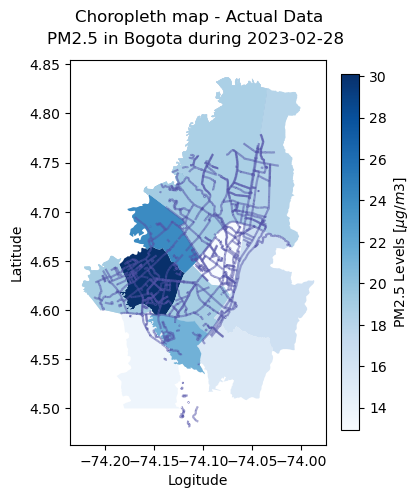

In [5]:
# plot actual data by daily
df_day_actual = pd.DataFrame()
for day in sorted(list(set(data_by_month.DateTime))):
    try:
        print(f"Processing daily: {day}")
        plot_actual_data_daily(muni, selected_day = day.day)

        # store PM2.5 by day to plot after 
        temp_day = muni[muni['DateTime'].dt.day == day.day].groupby(['DateTime', 'station_name'],as_index = False)['PM2.5'].mean()
        df_day_actual = pd.concat([df_day_actual, temp_day])
        if day != sorted(list(set(data_by_month.DateTime)))[-1]:
            plt.close('all')

    except Exception as e:
        print(f"An error occurred for day {day}: {e}")
        continue  # This will skip the rest of the current iteration and move to the next day

In [6]:
animation_daily = create_animation(folder_name = 'gif_make_daily_actual', animation_name = 'actual_day_PM2.5.gif')

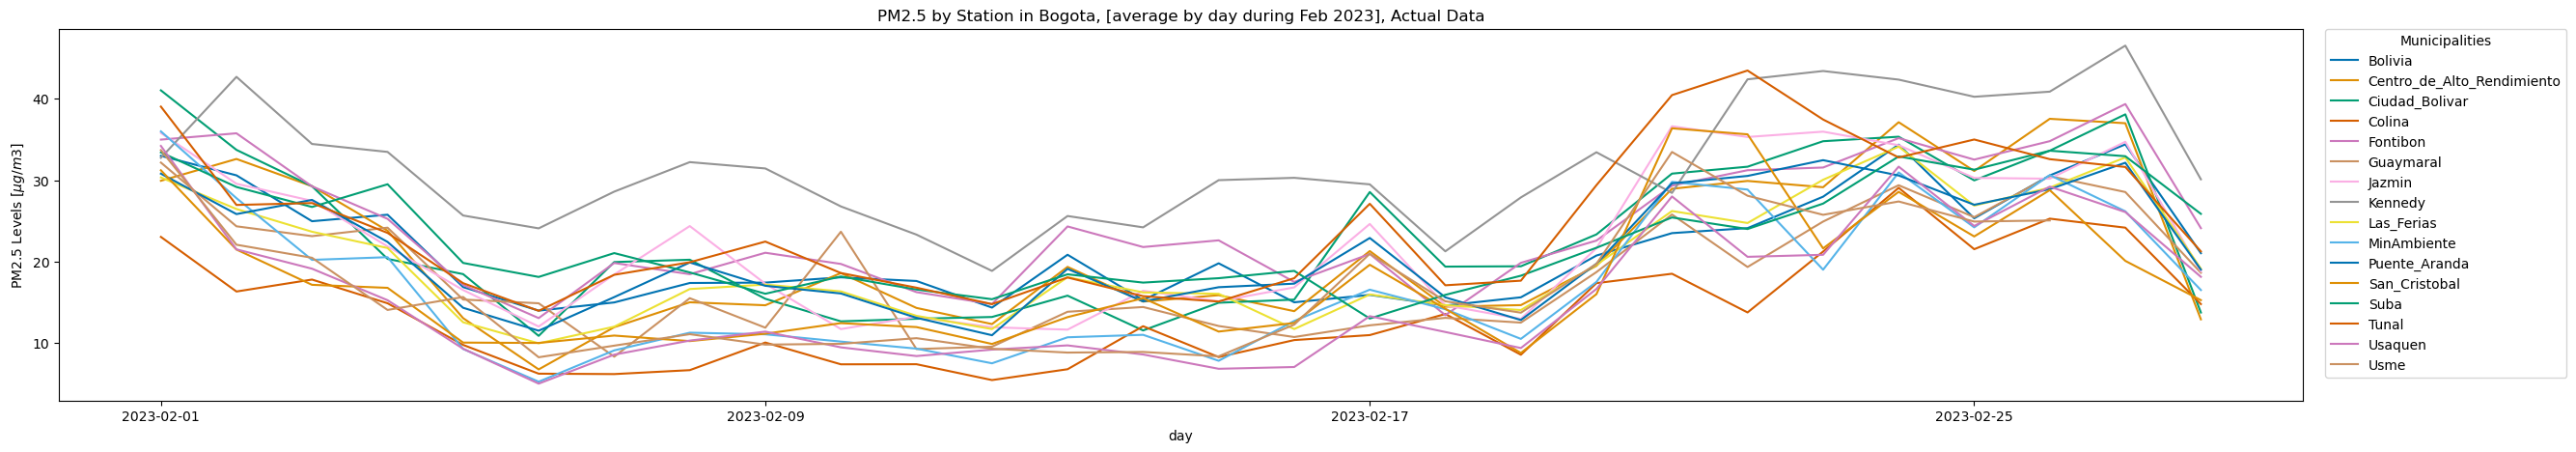

In [7]:
# plot the time series values of the animation for the actual data
fig, ax = plt.subplots(figsize = (30, 5))
sns.lineplot(data=df_day_actual, x="DateTime", y="PM2.5", hue= 'station_name', palette= 'colorblind')
ax.set_xticks(ax.get_xticks()[::2])
plt.xlabel('day')
plt.ylabel('PM2.5 Levels [$\mu g/m3$]')
plt.title('PM2.5 by Station in Bogota, [average by day during Feb 2023], Actual Data')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, title = 'Municipalities')
plt.show()

Processing day: 1
Processing day: 2
Processing day: 3
Processing day: 4
Processing day: 5
Processing day: 6
Processing day: 7
Processing day: 8
Processing day: 9
Processing day: 10
Processing day: 11
Processing day: 12
Processing day: 13
Processing day: 14
Processing day: 15
Processing day: 16
Processing day: 17
Processing day: 18
Processing day: 19
Processing day: 20
Processing day: 21
Processing day: 22
Processing day: 23
Processing day: 24
Processing day: 25
Processing day: 26
Processing day: 27
Processing day: 28


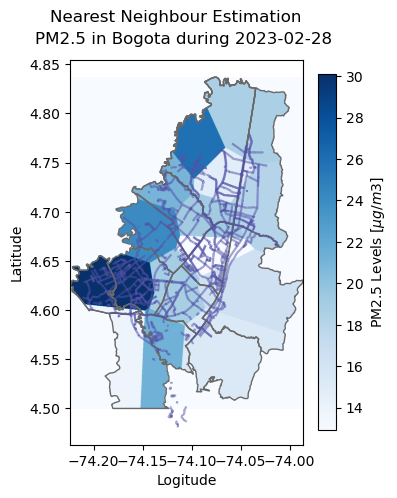

In [8]:
# generate nearest neighborh interpolation by day
df_day_near = pd.DataFrame()
for day in sorted(list(set(data_by_month.DateTime))):
    try:
        print(f"Processing day: {day.day}")
        muni_day = muni[muni['DateTime'].dt.day == day.day]
        estimate_by_nearest_interpolator(muni_day, daily_id = True)
        # store PM2.5 by day to plot after 
        temp_day = muni_day.groupby(['DateTime', 'station_name'],as_index = False)['PM2.5'].mean()
        df_day_near = pd.concat([df_day_near, temp_day])
        if day != sorted(list(set(data_by_month.DateTime)))[-1]:
            plt.close('all')

    except Exception as e:
        print(f"An error occurred for day {day}: {e}")
        continue  # This will skip the rest of the current iteration and move to the next day

In [9]:
animation_daily_near = create_animation(folder_name = 'gif_make_day_near', animation_name = 'day_PM2.5.gif')

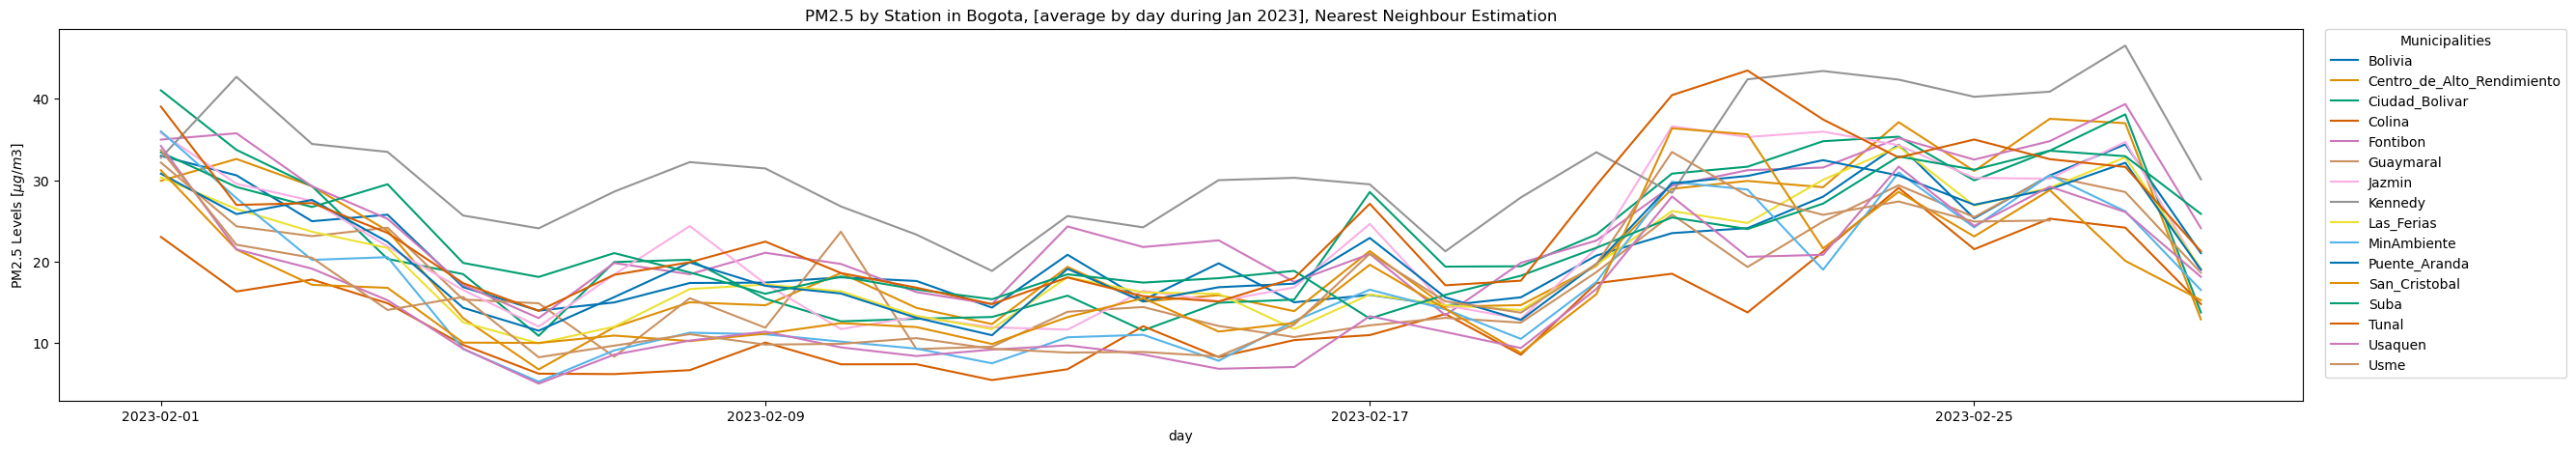

In [10]:
# plot the time series values of the animation for the nearest neighborh interpolation
fig, ax = plt.subplots(figsize = (30, 5))
sns.lineplot(data=df_day_near, x="DateTime", y="PM2.5", hue= 'station_name', palette= 'colorblind')
ax.set_xticks(ax.get_xticks()[::2])
plt.xlabel('day')
plt.ylabel('PM2.5 Levels [$\mu g/m3$]')
plt.title('PM2.5 by Station in Bogota, [average by day during Jan 2023], Nearest Neighbour Estimation')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, title = 'Municipalities')
plt.show()

Processing day: 1
Processing day: 2
Processing day: 3
Processing day: 4
Processing day: 5
Processing day: 6
Processing day: 7
Processing day: 8
Processing day: 9
Processing day: 10
Processing day: 11
Processing day: 12
Processing day: 13
Processing day: 14
Processing day: 15
Processing day: 16
Processing day: 17
Processing day: 18
Processing day: 19
Processing day: 20
Processing day: 21
Processing day: 22
Processing day: 23
Processing day: 24
Processing day: 25
Processing day: 26
Processing day: 27
Processing day: 28


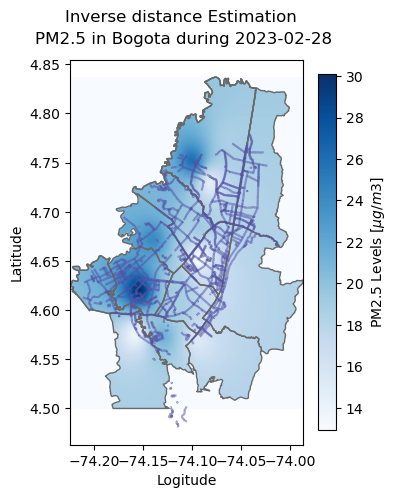

In [11]:
# generate nearest neighborh interpolation by day
df_day_inv = pd.DataFrame()
for day in sorted(list(set(data_by_month.DateTime))):
    try:
        print(f"Processing day: {day.day}")
        muni_day = muni[muni['DateTime'].dt.day == day.day]
        estimate_by_inv_distance(muni_day, daily_id = True)
        # store PM2.5 by day to plot after 
        temp_day = muni_day.groupby(['DateTime', 'station_name'],as_index = False)['PM2.5'].mean()
        df_day_inv = pd.concat([df_day_inv, temp_day])
        if day != sorted(list(set(data_by_month.DateTime)))[-1]:
            plt.close('all')

    except Exception as e:
        print(f"An error occurred for day {day}: {e}")
        continue  # This will skip the rest of the current iteration and move to the next day

In [12]:
animation_daily_inv = create_animation(folder_name = 'gif_make_inv_day', animation_name = 'inv_day_PM2.5.gif')

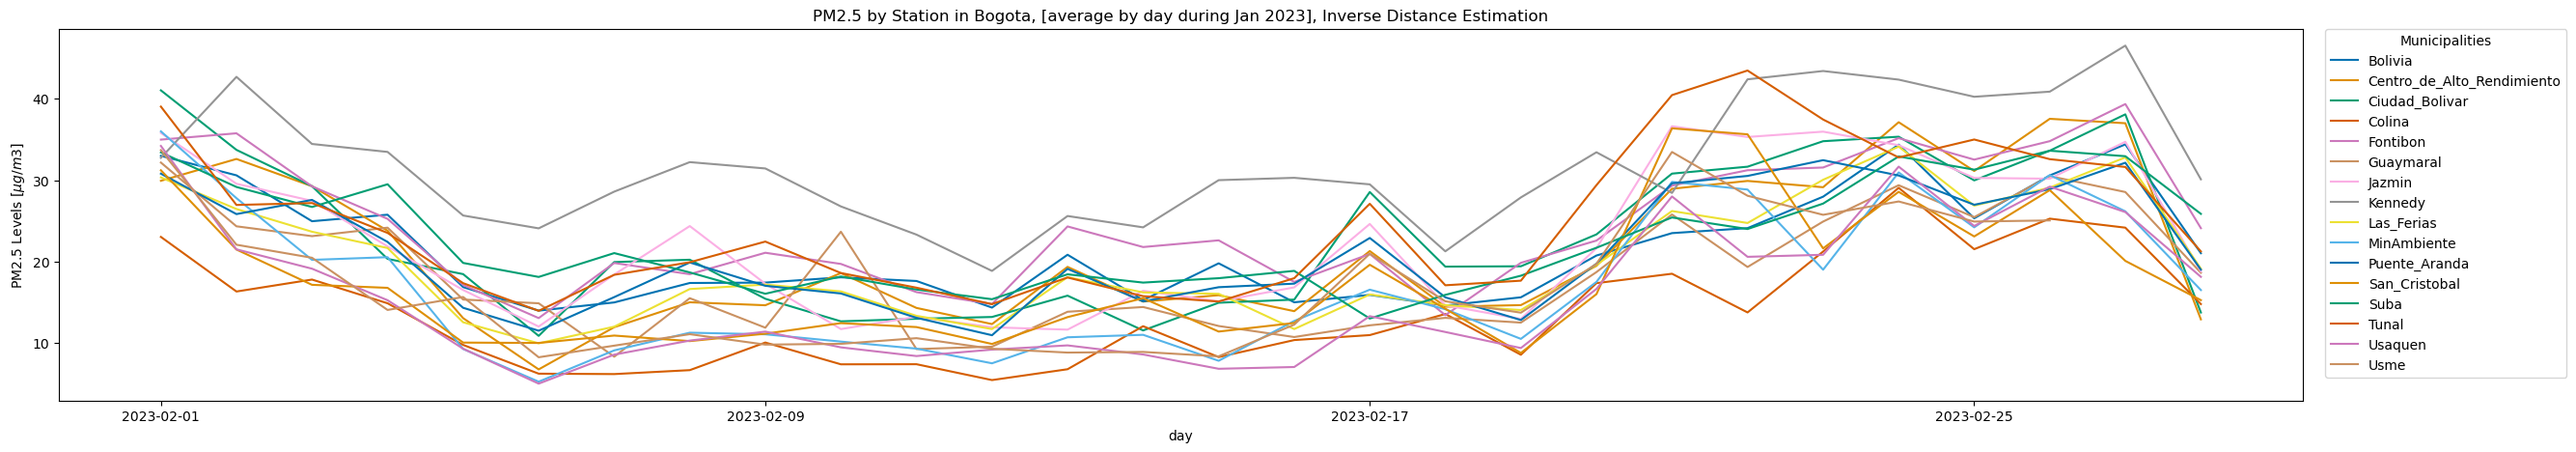

In [13]:
# plot the time series values of the animation for the nearest neighborh interpolation
fig, ax = plt.subplots(figsize = (30, 5))
sns.lineplot(data=df_day_inv, x="DateTime", y="PM2.5", hue= 'station_name', palette= 'colorblind')
ax.set_xticks(ax.get_xticks()[::2])
plt.xlabel('day')
plt.ylabel('PM2.5 Levels [$\mu g/m3$]')
plt.title('PM2.5 by Station in Bogota, [average by day during Jan 2023], Inverse Distance Estimation')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, title = 'Municipalities')
plt.show()